## Back Button

During image labeling, it is quite common to make a mistake and click on wrong label.  In order help improve the labeling process, we've added a back button.

To demonstrate how this works, let's grab a small dataset using the fastai library

In [11]:
# Load Libraries and "Notebook Parameters"
%load_ext autoreload
%autoreload 2

from fastai.vision import *
from pigeon import annotate
from IPython.display import display
from IPython.display import Image as IPyImage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
path = untar_data(URLs.MNIST)
path_tr = path/'training'

In [13]:
img_fps = list(path_tr.rglob('*.png'))
img_fps[:5]

[PosixPath('/home/csaroff/.fastai/data/mnist_png/training/5/30817.png'),
 PosixPath('/home/csaroff/.fastai/data/mnist_png/training/5/36588.png'),
 PosixPath('/home/csaroff/.fastai/data/mnist_png/training/5/57593.png'),
 PosixPath('/home/csaroff/.fastai/data/mnist_png/training/5/6027.png'),
 PosixPath('/home/csaroff/.fastai/data/mnist_png/training/5/12021.png')]

### Widget
Try labeling one as valid and then going back.  The existing label should show up in green

In [14]:
annotations = annotate(
  img_fps,
  options=['valid', 'invalid'],
  display_fn=lambda fn: display(IPyImage(str(fn)))
)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

If you prefer to use fastai's Image library, that's cool too.

In [15]:
annotations = annotate(
  img_fps,
  options=['valid', 'invalid'],
  display_fn=lambda fn: display(open_image(str(fn)))
)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

If you want to use fastai's Image.view method, things get a little a little tricky.

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

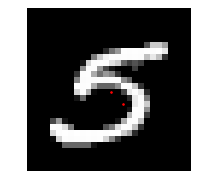

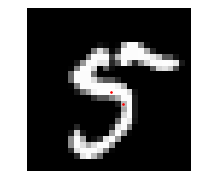

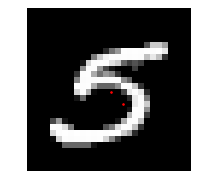

In [16]:
points = ImagePoints(FlowField([28, 28], Tensor([[14, 14], [16, 16]])))
annotations = annotate(
  img_fps,
  options=['valid', 'invalid'],
  display_fn=lambda fn: display(open_image(str(fn)).show(y=points))
)

Unfortunately, this technique doesn't refresh the image, but instead creates a new matplotlib axis to plot against with every call.  Digging deeper, it turns out that display_fn needs to return something that pigeon knows how to plot like matplotlib's axis's figure.

In [19]:
def get_labeled_figure(fp, ax):
    tagged_img = open_image(fp)
    ax.clear()
    tagged_img.show(ax=ax, y=points, title=os.path.basename(fp))

    # This is a bit of a hack to make this annotation library work
    # with fastai.  Because fastai images rely on the use of
    # matplotlib's imshow api, we'll grab the resulting figure and
    # render it
    return display(ax.figure)

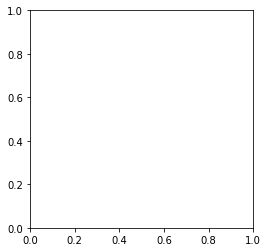

In [20]:
# Ugly hack
ax = subplots(1, 1)[0,0]

In [21]:
points = ImagePoints(FlowField([28, 28], Tensor([[14, 14], [16, 16]])))
annotations = annotate(
  img_fps,
  options=['valid', 'invalid'],
  display_fn=partial(get_labeled_figure, ax=ax)
)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

Yay!  Our annotation library works with fastai's image overlay features.